In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Translation files

In [3]:
from fastai.text import *

import warnings
warnings.filterwarnings("ignore")

French/English parallel texts from http://www.statmt.org/wmt15/translation-task.html .  It was created by Chris Callison-Burch, who crawled millions of web pages and then used *a set of simple heuristics to transform French URLs onto English URLs (i.e. replacing "fr" with "en" and about 40 other hand-written rules), and assume that these documents are translations of each other*.

In [4]:
PATH = Path('/fastai/data/translate')
TMP_PATH = PATH/'tmp'
TMP_PATH.mkdir()
fname = 'giga-fren.release2.fixed'
en_fname = PATH/f'{fname}.en'
fr_fname = PATH/f'{fname}.fr'

In [6]:
re_eq = re.compile('^(Wh[^?.!]+\?)')
re_fq = re.compile('^([^?.!]+\?)')

lines = ((re_eq.search(eq), re_fq.search(fq))
          for eq,fq in zip(open(str(en_fname), encoding='utf-8'), open(str(fr_fname), encoding='utf-8')))
qs = [(e.group(), f.group()) for e,f in lines if e and f]

In [200]:
len(qs)

52331

In [198]:
matN = -1
for i in range(len(qs)):
    if "what can not change ?" in qs[i][0]: 
        matN = i
        break
        
matN        

-1

In [190]:
matchSt

[199]

In [197]:
qs[17297][0]

'Where do you go, what do you do, who will take you?'

In [9]:
qs

[('What is light ?', 'Qu’est-ce que la lumière?'),
 ('Who are we?', 'Où sommes-nous?'),
 ('Where did we come from?', "D'où venons-nous?"),
 ('What would we do without it?', 'Que ferions-nous sans elle ?'),
 ('What is the absolute location (latitude and longitude) of Badger, Newfoundland and Labrador?',
  'Quelle sont les coordonnées (latitude et longitude) de Badger, à Terre-Neuve-etLabrador?'),
 ('What is the major aboriginal group on Vancouver Island?',
  'Quel est le groupe autochtone principal sur l’île de Vancouver?'),
 ('What are the advantages and disadvantages of using an online atlas versus a paper atlas?',
  'Quels sont les avantages et les désavantages d’utiliser un atlas en ligne comparativement à un atlas en copie papier?'),
 ('What types of land cover are associated with the colours below?',
  'À quel type de couverture des terres associez-vous les couleurs ci-dessous?'),
 ('What is the population of Canada?', 'Quelle est la population du Canada ?'),
 ('Which province is 

In [10]:
pickle.dump(qs, (PATH/'fr-en-qs.pkl').open('wb'))

In [11]:
qs = pickle.load((PATH/'fr-en-qs.pkl').open('rb'))

In [12]:
qs[:5], len(qs)

([('What is light ?', 'Qu’est-ce que la lumière?'),
  ('Who are we?', 'Où sommes-nous?'),
  ('Where did we come from?', "D'où venons-nous?"),
  ('What would we do without it?', 'Que ferions-nous sans elle ?'),
  ('What is the absolute location (latitude and longitude) of Badger, Newfoundland and Labrador?',
   'Quelle sont les coordonnées (latitude et longitude) de Badger, à Terre-Neuve-etLabrador?')],
 52331)

In [13]:
en_qs, fr_qs = zip(*qs)

In [14]:
en_qs[:5]

('What is light ?',
 'Who are we?',
 'Where did we come from?',
 'What would we do without it?',
 'What is the absolute location (latitude and longitude) of Badger, Newfoundland and Labrador?')

In [16]:
!python -m spacy download en

/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
    100% |████████████████████████████████| 37.4MB 104.1MB/s ta 0:00:01
  Running setup.py install for en-core-web-sm ... done
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via th

In [17]:
!python -m spacy download fr

/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
    100% |████████████████████████████████| 39.8MB 47.0MB/s ta 0:00:011    50% |████████████████                | 19.9MB 10.7MB/s eta 0:00:02
  Running setup.py install for fr-core-news-sm ... done
You are using pip version 10.0.1, 

In [18]:
en_tok = Tokenizer.proc_all_mp(partition_by_cores(en_qs))

In [19]:
fr_tok = Tokenizer.proc_all_mp(partition_by_cores(fr_qs), 'fr')

In [20]:
en_tok[0], fr_tok[0]

(['what', 'is', 'light', '?'],
 ['qu’', 'est', '-ce', 'que', 'la', 'lumière', '?'])

In [24]:
np.percentile([len(o) for o in en_tok], 90), np.percentile([len(o) for o in fr_tok], 90)

(23.0, 28.0)

In [25]:
keep = np.array([len(o)<30 for o in en_tok])

In [26]:
en_tok = np.array(en_tok)[keep]
fr_tok = np.array(fr_tok)[keep]

In [27]:
pickle.dump(en_tok, (PATH/'en_tok.pkl').open('wb'))
pickle.dump(fr_tok, (PATH/'fr_tok.pkl').open('wb'))

In [28]:
en_tok = pickle.load((PATH/'en_tok.pkl').open('rb'))
fr_tok = pickle.load((PATH/'fr_tok.pkl').open('rb'))

In [34]:
def toks2ids(tok,pre):
    freq = Counter(p for o in tok for p in o)
    itos = [o for o,c in freq.most_common(40000)]
    itos.insert(0, '_bos_')
    itos.insert(1, '_pad_')
    itos.insert(2, '_eos_')
    itos.insert(3, '_unk_')
    stoi = collections.defaultdict(lambda:3, {v:k for k,v in enumerate(itos)})
    ids = np.array([([stoi[o] for o in p] + [2]) for p in tok])
    np.save(str(TMP_PATH)+f'/{pre}_ids.npy', ids)
    pickle.dump(itos, open(str(TMP_PATH)+f'/{pre}_itos.pkl','wb'))
    return ids,itos,stoi

In [35]:
en_ids,en_itos,en_stoi = toks2ids(en_tok,'en')
fr_ids,fr_itos,fr_stoi = toks2ids(fr_tok,'fr')

In [36]:
def load_ids(pre):
    ids = np.load(str(TMP_PATH)+f'/{pre}_ids.npy')
    itos = pickle.load(open(str(TMP_PATH)+f'/{pre}_itos.pkl','rb'))
    stoi = collections.defaultdict(lambda:3, {v:k for k,v in enumerate(itos)})
    return ids,itos,stoi

In [37]:
en_ids,en_itos,en_stoi = load_ids('en')
fr_ids,fr_itos,fr_stoi = load_ids('fr')

In [38]:
[fr_itos[o] for o in fr_ids[0]], len(en_itos), len(fr_itos)

(['qu’', 'est', '-ce', 'que', 'la', 'lumière', '?', '_eos_'], 17573, 24793)

## Word vectors

fasttext word vectors available from https://fasttext.cc/docs/en/english-vectors.html

In [39]:
!pip install git+https://github.com/facebookresearch/fastText.git

  Cloning https://github.com/facebookresearch/fastText.git to /tmp/pip-req-build-2ou57e08
    100% |████████████████████████████████| 153kB 5.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for fasttext ... error
  Complete output from command /opt/conda/envs/fastai/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-req-build-2ou57e08/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-zz285u00 --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/fastText
  copying python/fastText/FastText.py -> build/lib.linux-x86_64-3.6/fastText
  copying python/fastText/__init__.py -> build/lib.linux-x86_64-3.6/fastText
  creating build/lib.linux-x86_64-3.6/fastText/util
  copying python/fastText/util/__init__.py -> build/lib.linux-x86_64-3.6/fastText/util


In [40]:
import fastText as ft

To use the fastText library, you'll need to download [fasttext word vectors](https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md) for your language (download the 'bin plus text' ones).

In [43]:
{str(PATH)}

{'/fastai/data/translate'}

In [44]:
!wget -P {str(PATH)} https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.en.zip

--2018-10-11 06:34:09--  https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.en.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.20.1
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.20.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10356881291 (9.6G) [application/zip]
Saving to: ‘/fastai/data/translate/wiki.en.zip’

wiki.en.zip         100%[===================>]   9.65G  41.6MB/s    in 3m 2s   

2018-10-11 06:37:10 (54.4 MB/s) - ‘/fastai/data/translate/wiki.en.zip’ saved [10356881291/10356881291]



In [45]:
!wget -P {str(PATH)} https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.fr.zip

--2018-10-11 06:37:15--  https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.fr.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.25
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5975701653 (5.6G) [application/zip]
Saving to: ‘/fastai/data/translate/wiki.fr.zip’

wiki.fr.zip         100%[===================>]   5.56G  48.6MB/s    in 1m 49s  

2018-10-11 06:39:05 (52.3 MB/s) - ‘/fastai/data/translate/wiki.fr.zip’ saved [5975701653/5975701653]



In [46]:
en_vecs =  ft.load_model(str(PATH/'wiki.en.bin'))

In [47]:
fr_vecs = ft.load_model(str(PATH/'wiki.fr.bin'))

In [48]:
def get_vecs(lang, ft_vecs):
    vecd = {w:ft_vecs.get_word_vector(w) for w in ft_vecs.get_words()}
    pickle.dump(vecd, open(str(PATH/f'wiki.{lang}.pkl'),'wb'))
    return vecd

In [49]:
en_vecd = get_vecs('en', en_vecs)
fr_vecd = get_vecs('fr', fr_vecs)

In [50]:
en_vecd = pickle.load(open(str(PATH/'wiki.en.pkl'),'rb'))
fr_vecd = pickle.load(open(str(PATH/'wiki.fr.pkl'),'rb'))

vecd is vector dictionary with word to vec mapping. ft_ stands for fasttext

In [51]:
ft_words = en_vecs.get_words(include_freq=True)
ft_word_dict = {k:v for k,v in zip(*ft_words)}
ft_words = sorted(ft_word_dict.keys(), key=lambda x: ft_word_dict[x])

len(ft_words)

2519370

In [52]:
dim_en_vec = len(en_vecd[','])
dim_fr_vec = len(fr_vecd[','])

dim_en_vec, dim_fr_vec

(300, 300)

In [53]:
en_vecs = np.stack(list(en_vecd.values()))
en_vecs.mean(), en_vecs.std()

(0.0075652334, 0.29283327)

## Model Data

In [55]:
enlen_top = int(np.percentile([len(o) for o in en_ids], 99)) #99th percentile of sentence lengths in english
frlen_top = int(np.percentile([len(o) for o in fr_ids], 97)) #97th percentile of sentence lengths in french
enlen_top, frlen_top

(29, 33)

In [56]:
en_ids_tr = np.array([o[:enlen_top] for o in en_ids])
fr_ids_tr = np.array([o[:frlen_top] for o in fr_ids])

We get the top longth and get training set with top lenghts for all set in each language
in FastAi Library - T is tensor, V is variable , A is array - they are all wrapper functions with some useful features. We define Seq2SeqDataset that inherist Dataset

In [57]:
class Seq2SeqDataset(Dataset):
    def __init__(self,x,y): self.x,self.y = x,y
    def __getitem__(self,idx): return A(self.x[idx],self.y[idx])
    def __len__(self): return len(self.x)

In [58]:
np.random.seed(42)
trn_keep = np.random.rand(len(en_ids_tr))>0.1
en_trn,fr_trn = en_ids_tr[trn_keep], fr_ids_tr[trn_keep]
en_val,fr_val = en_ids_tr[~trn_keep], fr_ids_tr[~trn_keep]
len(en_trn),len(en_val)

(45219, 5041)

In [61]:
trn_keep

array([ True,  True,  True, ..., False,  True, False])

In the above cell, we randomize 90% values from en_ids_tr set and store in Keep as True/False array. We then apply them to get training set and for validation by using ~trn_keep it keeps those that were not kept in training set

In [62]:
trn_ds = Seq2SeqDataset(fr_trn,en_trn)
val_ds = Seq2SeqDataset(fr_val,en_val)

In [63]:
bs=125

SortishSampler is used for training set to sort randomly with randomly varying lengths of sentences in batch this is similar to bptt variation

In [64]:
trn_samp = SortishSampler(en_trn, key=lambda x: len(en_trn[x]), bs=bs)
val_samp = SortSampler(en_val, key=lambda x: len(en_val[x]))

In [82]:
trn_dl = DataLoader(trn_ds, bs, transpose=True, transpose_y=True, num_workers=1,
                     pad_idx=1, pre_pad=False, sampler=trn_samp)
val_dl = DataLoader(val_ds, int(bs*1.6), transpose=True, transpose_y=True, num_workers=1,
                     pad_idx=1, pre_pad=False, sampler=val_samp)
md =  ModelData(str(PATH), trn_dl, val_dl)

In [83]:
it = iter(trn_dl)
its = [next(it) for i in range(5)]
[(len(x), len(y)) for x,y in its]

[(33, 29), (33, 22), (23, 11), (29, 8), (33, 18)]

## Initial model

wgts in vecs has a std (standard deviation) of .3 while the rest of our weights have 1. So we multiply them by 3. This is a hack.

In [92]:
def create_emb(vecs, itos, em_sz):
    emb =  nn.Embedding(len(itos), em_sz, padding_idx=1)
    wgts =  emb.weight.data
    miss = []
    for i,w in enumerate(itos):
        try: wgts[i] = torch.from_numpy(vecs[w]*3)
        except: miss.append(w)
    print(len(miss), miss[5:10])
    return emb

In [93]:
nh, nl = 256, 2

In [94]:
class Seq2SeqRNN(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
    def forward(self, inp):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out,h = self.gru_enc(emb, h)
        h = self.out_enc(h)
        
        dec_inp = V(torch.zeros(bs).long())
        res = []
        for i in range(self.out_sl): # we go one by for the sequence length
            emb = self.emb_dec(dec_inp).unsqueeze(0) # input size at this point is one by one so unsqueeze
            outp, h = self.gru_dec(emb,h)
            outp = self.out(self.out_drop(outp[0])) # again for one?
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if(dec_inp==1).all(): break # if all padding chars then sentence over, break
        return torch.stack(res)
    
    def initHidden(self,bs): return V(torch.zeros(self.nl, bs, self.nh))

Pytorch padding function below is weird, it expects a padding left and a right value for each dimension. Since the input in this case is 3 dimensional (sequence length, batch size, embed size) we mention 0 for no padding left, right for 2 dimensions and 0 for left and sl-sl_in for last dimension

In [95]:
def seq2seq_loss(input, target):
    sl,bs = target.size()
    sl_in,bs_in,nc = input.size()
    if sl>sl_in: input = F.pad(input, (0,0,0,0,0,sl-sl_in))
    input = input[:sl]
    return F.cross_entropy(input.view(-1,nc), target.view(-1)) # you can use ignore_index as neeeded?

In [96]:
opt_fn =  partial(optim.Adam, betas=(0.8,0.99))

In [97]:
rnn = Seq2SeqRNN(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_top)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss 

3097 ['l’', "d'", 't_up', 'd’', "qu'"]
1285 ["'s", '’s', "n't", 'n’t', ':']


the missing are characters in the overall data set that are missing in the training set of questions after tokenizing

 64%|██████▍   | 233/362 [00:29<00:16,  7.84it/s, loss=31]  

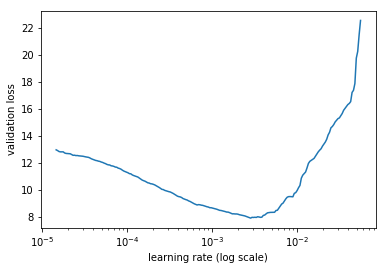

In [98]:
learn.lr_find()
learn.sched.plot()

In [99]:
lr=3e-3

In [100]:
learn.fit(lr, 1, cycle_len=12, use_clr=(20,10))

epoch      trn_loss   val_loss                              
    0      5.290665   5.294168  
    1      4.345136   4.510454                              
    2      3.879665   4.073317                              
    3      3.624475   3.847291                              
    4      3.504266   3.719473                              
    5      3.127467   3.613117                              
    6      3.062765   3.580868                              
    7      3.068048   3.522285                              
    8      3.113343   3.561151                              
    9      2.753174   3.524441                              
    10     2.743297   3.457342                              
    11     2.690315   3.452108                              


[3.452108492857879]

In [101]:
learn.save('initial')

In [102]:
learn.load('initial')

## Test

In [105]:
x,y = next(iter(val_dl))
probs = learn.model(V(x))
preds = to_np(probs.max(2)[1])

for i in range(80,90):
    print(' '.join([fr_itos[o] for o in x[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in y[:,i] if o != 1]))
    print(' '.join([en_itos[o] for o in preds[:,i] if o != 1]))
    print()

quel est le lien entre la maladie x et les facteurs de risque associés au mode de vie comme le régime alimentaire , l' usage du tabac , l' activité physique , le
what is the association between disease x and risk factors such as diet , tobacco use , physical activity level , education , income or gender ? _eos_
what is the link between relationship and and and , , , , , , , , , , of of of ? ? ? ? _eos_

quelles politiques et interventions sont nécessaires dans et à travers les secteurs , afin de protéger les populations avec efficacité , spécialement celles des groupes vulnérables , des effets de conditions de vie
what policies and interventions are needed within and across sectors to effectively protect citizens especially vulnerable groups , from unhealthy and inadequate working and living conditions ? _eos_
what policy and policies and and and , , , , , , , , , populations populations populations populations populations populations populations populations ? ? ? ? _eos_

que nous dit

## Bidir

In [108]:
class Seq2SeqRNN_Bidir(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl,nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl, self.nh, self.out_sl = nl, nh, out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25, bidirectional=True)
        self.out_enc = nn.Linear(nh*2, em_sz_dec, bias=False)
        self.drop_enc = nn.Dropout(0.05)
        
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
    def forward(self, inp):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = h.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(2,bs,-1)
        h = self.out_enc(self.drop_enc(h))
        
        dec_inp = V(torch.zeros(bs).long())
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
        return torch.stack(res)
    
    def initHidden(self, bs): return V(torch.zeros(self.nl*2, bs, self.nh))

In [109]:
rnn = Seq2SeqRNN_Bidir(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_top)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

3097 ['l’', "d'", 't_up', 'd’', "qu'"]
1285 ["'s", '’s', "n't", 'n’t', ':']


In [110]:
learn.fit(lr, 1, cycle_len=12, use_clr=(20,10))

epoch      trn_loss   val_loss                              
    0      4.622416   4.517572  
    1      4.008706   4.073753                              
    2      3.904645   3.815616                              
    3      3.75466    3.700409                              
    4      3.56835    3.614633                              
    5      3.501043   3.561358                              
    6      3.009494   3.494968                              
    7      2.908138   3.503574                              
    8      2.859843   3.434534                              
    9      2.754636   3.467621                              
    10     2.643634   3.416194                              
    11     2.587503   3.372697                              


[3.3726969577329213]

In [111]:
learn.save('bidir')

## Teacher forcing

In [132]:
class Seq2SeqStepper(Stepper):
    def step(self, xs, y, epoch):
        self.m.pr_force = (10-epoch)*0.1 if epoch<10 else 0
        xtra = []
        output = self.m(*xs, y)
        if isinstance(output, tuple): output,*xtra = output
        self.opt.zero_grad()
        loss = raw_loss = self.crit(output, y)
        if self.reg_fn: loss = self.reg_fn(output, xtra, raw_loss)
        loss.backward()
        if self.clip: # Gradient clipping
            nn.utils.clip_grad_norm(trainable_params(self.m), self.clip)
        self.opt.step()
        return raw_loss.data[0]

In [133]:
class Seq2SeqRNN_TeacherForcing(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)
        
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        self.pr_force = 1.
        
    def forward(self, inp, y=None):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)
        
        dec_inp = V(torch.zeros(bs).long())
        res = []
        for i in range(self.out_sl):
            emb = self.emb_dec(dec_inp).unsqueeze(0)
            outp, h = self.gru_dec(emb, h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp =  V(outp.data.max(1)[1])
            if(dec_inp==1).all(): break
            if (y is not None) and (random.random() < self.pr_force):
                if i>=len(y): break
                dec_inp=y[i]
        return torch.stack(res)
    
    def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))

In [134]:
rnn = Seq2SeqRNN_TeacherForcing(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_top)
learn =  RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

3097 ['l’', "d'", 't_up', 'd’', "qu'"]
1285 ["'s", '’s', "n't", 'n’t', ':']


In [118]:
learn.fit(lr, 1, cycle_len=12, use_clr=(20,10), stepper=Seq2SeqStepper)

epoch      trn_loss   val_loss                                                         
    0      4.017907   7.641694  
    1      3.535268   7.068921                                                         
    2      3.021273   5.560058                                                         
    3      2.853995   4.706978                                                         
    4      2.844164   4.585474                                                         
    5      2.793568   4.053667                                                         
    6      2.968587   3.823235                                                         
    7      3.011589   3.751518                                                         
    8      2.846024   3.574701                                                         
    9      2.733493   3.462751                                                         
    10     2.945622   3.42167                                                          

[3.397034936848909]

In [119]:
learn.save('forcing')

## Attention Model

In [135]:
def rand_t(*sz): return torch.randn(sz)/math.sqrt(sz[0])
def rand_p(*sz): return nn.Parameter(rand_t(*sz))

In [148]:
class Seq2SeqAttnRNN(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl, self.nh, self.out_sl = nl, nh, out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25)
        self.out_enc = nn.Linear(nh, em_sz_dec, bias=False)

        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
        self.W1 = rand_p(nh, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh, em_sz_dec)
        self.V =  rand_p(em_sz_dec)
        
    def forward(self, inp, y=None, ret_attn=False):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = self.out_enc(h)
        
        dec_inp =  V(torch.zeros(bs).long())
        res, attns = [],[]
        wle = enc_out @ self.W1 # @ is for matric multiplication
        for i in range(self.out_sl):
            w2h = self.l2(h[-1])
            u = F.tanh(wle + w2h)
            a = F.softmax(u @ self.V, 0)
            attns.append(a)
            Xa = (a.unsqueeze(2) * enc_out).sum(0)
            emb = self.emb_dec(dec_inp)
            wgt_enc = self.l3(torch.cat([emb, Xa], 1))
            
            outp, h = self.gru_dec(wgt_enc.unsqueeze(0), h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            
            dec_inp = V(outp.data.max(1)[1])
            if (dec_inp==1).all(): break
            if (y is not None) and (random.random()<self.pr_force):
                if(i>=len(y)): break
                dec_inp = y[i]
        res = torch.stack(res)
        if ret_attn: res = res, torch.stack(attns)
        return res
    
    def initHidden(self, bs): return V(torch.zeros(self.nl, bs, self.nh))

In [149]:
rnn = Seq2SeqAttnRNN(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_top)
learn =  RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

3097 ['l’', "d'", 't_up', 'd’', "qu'"]
1285 ["'s", '’s', "n't", 'n’t', ':']


In [150]:
lr=2e-3

In [151]:
learn.fit(lr, 1, cycle_len=15, use_clr=(20,10), stepper=Seq2SeqStepper)

epoch      trn_loss   val_loss                                                         
    0      3.728506   13.552629 
    1      3.192125   6.508628                                                         
    2      2.957082   5.225669                                                         
    3      2.907049   4.798698                                                         
    4      2.80753    4.192246                                                         
    5      2.79095    3.977765                                                         
    6      2.902605   3.784572                                                         
    7      2.946442   3.556604                                                         
    8      2.907391   3.473531                                                         
    9      2.936371   3.345103                                                         
    10     3.034664   3.314402                                                         

[3.2490609731259883]

In [152]:
learn.save('attn')

In [153]:
learn.load('attn')

## Test

In [154]:
x,y = next(iter(val_dl))
probs, attns =  learn.model(V(x), ret_attn=True)
preds = to_np(probs.max(2)[1])

In [155]:
for i in range(180,190):
    print(' '.join([fr_itos[o] for o in x[:,i] if o!=1]))
    print(' '.join([en_itos[o] for o in y[:,i] if o!=1]))
    print(' '.join([en_itos[o] for o in preds[:,i] if o!=1]))
    print()

quelles composantes des différents aspects de la performance devraient être mesurées , quelles données pertinentes recueillir et comment ? _eos_
which components within various performance areas should be measured , whatkinds of data are appropriate to collect , and how should this be done ? _eos_
what components of the performance be be be be be and and and and how ? _eos_ _eos_

le premier ministre doit - il nommer un ministre d’ état à la santé mentale , à la maladie mentale et à la toxicomanie ? _eos_
what role can the federal government play to ensure that individuals with mental illness and addiction have access to the drug therapy they need ? _eos_
what minister minister minister minister minister minister minister to health health mental mental mental mental mental ? _eos_ _eos_

quelles sont les conséquences de la hausse des formes d’ emploi non conformes aux normes chez les travailleurs hautement qualifiés et chez ceux qui occupent des emplois plus marginaux ? _eos_
what is t

In [161]:
attns.shape

torch.Size([29, 33, 200])

In [162]:
attns[...,180]

tensor([[0.0023, 0.7614, 0.1639, 0.0170, 0.0062, 0.0179, 0.0121, 0.0012, 0.0025,
         0.0009, 0.0003, 0.0001, 0.0004, 0.0047, 0.0037, 0.0022, 0.0003, 0.0002,
         0.0003, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002,
         0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002],
        [0.0017, 0.0437, 0.2795, 0.1476, 0.0318, 0.0613, 0.0748, 0.0425, 0.1548,
         0.0691, 0.0165, 0.0056, 0.0032, 0.0056, 0.0276, 0.0139, 0.0024, 0.0011,
         0.0012, 0.0014, 0.0013, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013,
         0.0012, 0.0011, 0.0010, 0.0009, 0.0009, 0.0008],
        [0.0079, 0.0043, 0.0120, 0.0720, 0.0878, 0.1560, 0.1640, 0.0620, 0.1598,
         0.0737, 0.0198, 0.0200, 0.0084, 0.0162, 0.0557, 0.0333, 0.0072, 0.0036,
         0.0029, 0.0023, 0.0022, 0.0024, 0.0025, 0.0026, 0.0026, 0.0024, 0.0025,
         0.0026, 0.0026, 0.0024, 0.0023, 0.0021, 0.0020],
        [0.0079, 0.0005, 0.0022, 0.0338, 0.0842, 0.1295, 0.1347, 0.0855, 0.2008,
         0.0985,

In [160]:
attns[...,180].shape

torch.Size([29, 33])

In [156]:
attn = to_np(attns[...,180])

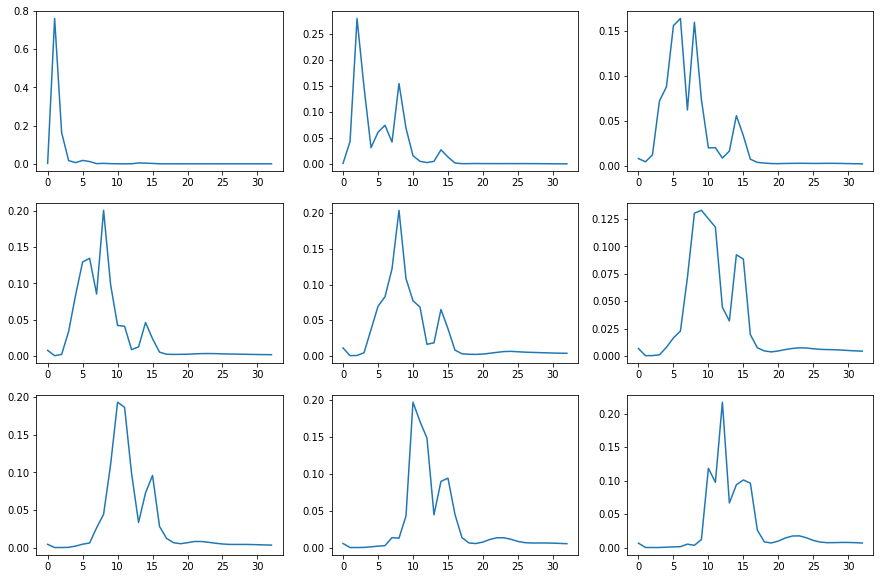

In [157]:
fig, axes =  plt.subplots(3, 3, figsize=(15,10))
for i,ax in enumerate(axes.flat):
    ax.plot(attn[i])

## All

In [164]:
class Seq2SeqRNN_All(nn.Module):
    def __init__(self, vecs_enc, itos_enc, em_sz_enc, vecs_dec, itos_dec, em_sz_dec, nh, out_sl, nl=2):
        super().__init__()
        self.emb_enc = create_emb(vecs_enc, itos_enc, em_sz_enc)
        self.nl,self.nh,self.out_sl = nl,nh,out_sl
        self.gru_enc = nn.GRU(em_sz_enc, nh, num_layers=nl, dropout=0.25, bidirectional=True)
        self.out_enc = nn.Linear(nh*2, em_sz_dec, bias=False)
        self.drop_enc = nn.Dropout(0.15)
        
        self.emb_dec = create_emb(vecs_dec, itos_dec, em_sz_dec)
        self.gru_dec = nn.GRU(em_sz_dec, em_sz_dec, num_layers=nl, dropout=0.1)
        self.emb_enc_drop = nn.Dropout(0.15)
        self.out_drop = nn.Dropout(0.35)
        self.out = nn.Linear(em_sz_dec, len(itos_dec))
        self.out.weight.data = self.emb_dec.weight.data
        
        self.W1 = rand_p(nh*2, em_sz_dec)
        self.l2 = nn.Linear(em_sz_dec, em_sz_dec)
        self.l3 = nn.Linear(em_sz_dec+nh*2, em_sz_dec)
        self.V = rand_p(em_sz_dec)
        
    def forward(self, inp, y=None):
        sl,bs = inp.size()
        h = self.initHidden(bs)
        emb = self.emb_enc_drop(self.emb_enc(inp))
        enc_out, h = self.gru_enc(emb, h)
        h = h.view(2,2,bs,-1).permute(0,2,1,3).contiguous().view(2,bs,-1)
        h = self.out_enc(self.drop_enc(h))
        
        dec_inp = V(torch.zeros(bs).long())
        res, attns = [],[]
        wle = enc_out @ self.W1
        for i in range(self.out_sl):
            w2h = self.l2(h[-1])
            u = F.tanh(wle + w2h)
            a = F.softmax(u @ self.V, 0) #0 is dimension
            attns.append(a)
            Xa = (a.unsqueeze(2) * enc_out).sum(0)
            emb = self.emb_dec(dec_inp)
            wgt_enc = self.l3(torch.cat([emb, Xa], 1))
            
            outp,h = self.gru_dec(wgt_enc.unsqueeze(0), h)
            outp = self.out(self.out_drop(outp[0]))
            res.append(outp)
            dec_inp = V(outp.data.max(1)[1])
            if(dec_inp==1).all(): break
            if(y is not None) and (random.random()<self.pr_force):
                if i>=len(y): break
                dec_inp = y[i]
        return torch.stack(res)
    
    def initHidden(self, bs): return V(torch.zeros(self.nl*2, bs, self.nh))

In [165]:
rnn = Seq2SeqRNN_All(fr_vecd, fr_itos, dim_fr_vec, en_vecd, en_itos, dim_en_vec, nh, enlen_top)
learn = RNN_Learner(md, SingleModel(to_gpu(rnn)), opt_fn=opt_fn)
learn.crit = seq2seq_loss

3097 ['l’', "d'", 't_up', 'd’', "qu'"]
1285 ["'s", '’s', "n't", 'n’t', ':']


In [166]:
learn.fit(lr, 1, cycle_len=15, use_clr=(20,10), stepper=Seq2SeqStepper)

epoch      trn_loss   val_loss                                                         
    0      3.55782    9.024332  
    1      3.118022   5.726827                                                         
    2      2.940663   5.127235                                                         
    3      3.013963   4.980318                                                         
    4      2.761462   4.131383                                                         
    5      2.796623   3.779311                                                         
    6      2.792812   3.636094                                                         
    7      2.831686   3.610654                                                         
    8      2.717591   3.491008                                                         
    9      2.737992   3.2936                                                           
    10     2.605082   3.260493                                                         

[3.2536840351818337]

## Test

In [176]:
x,y = next(iter(val_dl))
probs = learn.model(V(x))
preds = to_np(probs.max(2)[1])

for i in range(190,200):
    print(' '.join([fr_itos[o] for o in x[:,i] if o!=1]))
    print(' '.join([en_itos[o] for o in y[:,i] if o!=1]))
    print(' '.join([en_itos[o] for o in preds[:,i] if o!=1]))
    print()

pourquoi nos ancêtres dane - zaa ont dû quitter leur réserve traditionnelle et leur lieu de rassemblement de gat tah kwą̂ ( montney ) ? _eos_
why did our dane - zaa people have to move from their traditional reserve and gathering place at gat tah kwą̂ ( montney ) ? _eos_
why did our dane dane zaa zaa their their their traditional and and and zaa zaa the ( ( tah ) ) ? _eos_ _eos_

que pensez - vous de l' initiative de la municipalité de rotterdam d' organiser des débats sur le thème " islam et intégration " ? _eos_
what do you think of the initiative taken by the municipality of rotterdam to organise debates on the theme ' islam and integration ' ? _eos_
what is your opinion of the initiative initiative initiative initiative to on the and and and and " " ? ? _eos_

en particulier , que devrions - nous faire face aux t_up hfc et autres gaz à effet de serre que l' on vante présentement en tant que remplacements des t_up cfc et des
what , in particular , should we do about hfcs and any oth